In [46]:
%matplotlib inline 

In [77]:

import matplotlib.pyplot as plt
from sympy import symbols, Piecewise, integrate, init_printing
from sympy.utilities.lambdify import lambdify
import numpy as np
from scipy.integrate import quad
from matplotlib.ticker import *
init_printing(use_unicode = False, wrap_line = False,pretty_print=True) #for beautiful printing 

In [86]:
##################### defining constants
q = 4.8032 * 10**-10  #Electron charge, g**(1/2)*cm**(3/2)*s**-1
h = 6.5821* 10**-16   #Planck constants h bar, Ev*s
m = 9.1095 * 10**-28  #Electron mass, g
c = 2.9979 * 10**10   #Light speed, cm*s-1
mcsquare = 511000     #0.511 MeV electrons rest energy
hev = 4.135667662*10**-15 #Plank's constant in eV
ergtoev = 6.24*10**11 #eV
evtoerg = 0.16*10**-11 #erg
distance = 1.88274 * 10**28 #Distance Earth and object
gamma_min = 2000      #Electron min energy
gamma_max = 10**10    #Electron max energy
delta = 18            #Doppler and Lorenz factor
gamma_br = 5.4*10**3 
N0 = 23*10**52
alpha1 = 2
alpha2 = 3.79
#############################################

#symbols
x,B,gamma,Eg,j = symbols("x B gamma Eg j")
#######
#Functions
F= 2.15*x**(1/3)*(1+3.06*x)**(1/6)*(1+0.884*x**(2/3)+0.471*x**(4/3))*2.718281828**(-x)/(1+1.64*x**(2/3)+0.974*x**(4/3)) #no dimention
Ec = 3*q*h*B*gamma**2/(2*m*c)  ##dimention is eV
Energy=(3**0.5*q**3*B*F.subs(x,Eg/Ec))/(2*np.pi*mcsquare*h*Eg) #Bessel function is energy dN/(dEgdt)


#Electron Distribution
ElectronDist= Piecewise((N0*gamma**(-alpha1),  gamma<gamma_br), (N0*gamma_br**(alpha2-alpha1)*gamma**(-alpha2), gamma>=gamma_br)) #is apiecewise function, for given condition

#luminosity and flux for exponential law 
EnergySyn_integrand = 10**j * np.log(10) * Energy.subs (gamma,10**j) *ElectronDist.subs(gamma,10**j) #integrand function

In [87]:
"""EnergySyn_integrand_lamd = lambdify((j,B,Eg),EnergySyn_integrand)
#quad(EnergySyn_integrand_lamd,1,100,args=(B,Eg))
EnergySyn_integrand_lamd"""

'EnergySyn_integrand_lamd = lambdify((j,B,Eg),EnergySyn_integrand)\n#quad(EnergySyn_integrand_lamd,1,100,args=(B,Eg))\nEnergySyn_integrand_lamd'

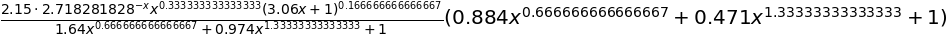

In [88]:
F

In [89]:
Ec

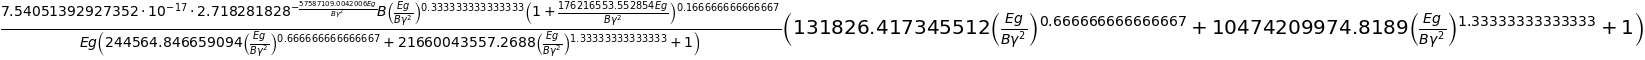

In [90]:
Energy

In [91]:
ElectronDist

/230000000000000000000000000000000000000000000000000000                     
|------------------------------------------------------  for gamma < 5400.0 
|                             2                                             
<                        gamma                                              
|                                                                           
|                                     -3.79                                 
\           1.10334839120496e+60*gamma                   for gamma >= 5400.0

In [97]:
from tqdm import tqdm
tqdm(integrate(Energy,(B,ln( gamma_min,10),ln(gamma_max,10))))


0it [00:00, ?it/s]

0it [00:00, ?it/s]

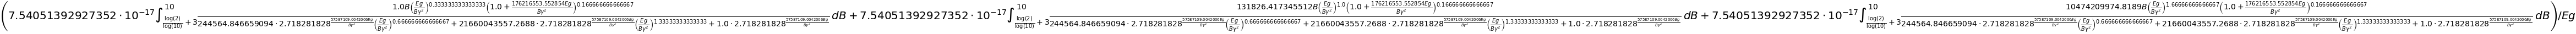

In [99]:
integrate(Energy,(B,ln( gamma_min,10),ln(gamma_max,10)))